# Learning From Data - Homework 4
## Ognen Nastov

<img src="hw4_images/hw4p1.png">

**Answer:**

$$\delta = 0.05$$
$$\epsilon = 0.05$$

$$N ≥ \frac{8}{\epsilon^2} \ln\left(\frac{4 m_H(2 N)}{\delta}\right)$$
$$N ≥ \frac{8}{\epsilon^2} \ln\left(\frac{4 (2 N)^{d_{vc}}}{\delta}\right)$$

Iterate:  
- Try $N = 400,000$. $N ≥ \frac{8}{0.05^2} \ln\left(\frac{4 \times (2 \times 400,000)^{10}}{0.05}\right) ≈ 448,978$.
- Try $N = 448,978$. $RHS ≈ 452,675$.
- Try $N = 452,675$. $RHS ≈ 452,937$.
- Try $N = 452,937$. $RHS ≈ 452,955$.

Closest $N = 460,000$, so answer is [d].

---

<img src="hw4_images/hw4p2.png">

**Answer:**

Bounds [c] and [d]: solve for $\epsilon$ using quadratic equation solution formula.

$$m_H(n) = \begin{cases} 2^n & \text{for } n < d_{vc}\\
n^{d_{vc}} & \text{for } n ≥ d_{vc}
\end{cases}$$

Smallest bound for $N=10,000$?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# problems 2 and 3
# m_H(n) = 2^n for n < d_vc
# m_H(n) = (n)^d_vc for n ≥ d_vc

def orig_vc_bound(N, delta, d_vc):
    if 2*N < d_vc:
        term = 2*N*np.log(2)
    else:
        term = d_vc*np.log(2*N)   
    value = np.sqrt((8/N)*(term + np.log(4/delta)))
    return value

def rademacher_penalty_bound(N, delta, d_vc):
    if N < d_vc:
        term = N*np.log(2)
    else:
        term = d_vc*np.log(N)
    value = np.sqrt((2/N)*(np.log(2*N) + term)) + \
            np.sqrt((2/N)*np.log(1/delta)) + \
            1/N
    return value

def parrondo_van_den_broek_bound(N, delta, d_vc):
    if 2*N < d_vc:
        term = 2*N*np.log(2)
    else:
        term = d_vc*np.log(2*N)
    value = (1/N) + np.sqrt((1/(N*N)) + \
             (1/N)*(np.log(6/delta) + term))
    return value

def devroye_bound(N, delta, d_vc):
    if N*N < d_vc:
        term = N*N*np.log(2)
    else:
        term = 2*d_vc*np.log(N)
    value = 1/(N-2) + np.sqrt(1/np.power(N-2,2) + \
            (1/(2*(N-2)))*(np.log(4/delta) + term))
    return value

In [2]:
orig_vc_bound(10000, 0.05, 50)

0.632174915200836

In [3]:
rademacher_penalty_bound(10000, 0.05, 50)

0.3313087859616395

In [4]:
parrondo_van_den_broek_bound(10000, 0.05, 50)

0.2236982936807856

In [5]:
devroye_bound(10000, 0.05, 50)

0.2152280498082467

Smallest bound for $N = 10,000$ is Devroye bound, [d].

---

<img src="hw4_images/hw4p3.png">

**Answer:**

In [6]:
orig_vc_bound(5, 0.05, 50)

4.254597220000659

In [7]:
rademacher_penalty_bound(5, 0.05, 50)

2.813654929686762

In [8]:
parrondo_van_den_broek_bound(5, 0.05, 50)

1.74395359699581

In [9]:
devroye_bound(5, 0.05, 50)

2.264540762867992

Smallest bound is Parrondo and Van den Broek bound, [c].

In [10]:
# plot the 4 bounds as function of N

def plot_bounds(N_min, N_max, num_pts):
    delta = 0.05
    d_vc = 50
    N = np.linspace(N_min, N_max, num_pts)
    ix = 0
    o = np.zeros(num_pts)
    r = np.zeros(num_pts)
    p = np.zeros(num_pts)
    d = np.zeros(num_pts)
    for n in N:
        o[ix] = orig_vc_bound(n, delta, d_vc)
        r[ix] = rademacher_penalty_bound(n, delta, d_vc)
        p[ix] = parrondo_van_den_broek_bound(n, delta, d_vc)
        d[ix] = devroye_bound(n, delta, d_vc)
        ix += 1
    plt.figure(figsize=(8,8), dpi=80)
    #plt.axis([N_min, N_max, -1,1])
    plt.grid()
    plt.plot(N, o, 'b', label="orig")
    plt.plot(N, r, 'r', label="rademacher")
    plt.plot(N, p, 'g', label="parrondo")
    plt.plot(N, d, 'm', label="devroye")
    plt.legend(loc='upper right', frameon=True)
    return

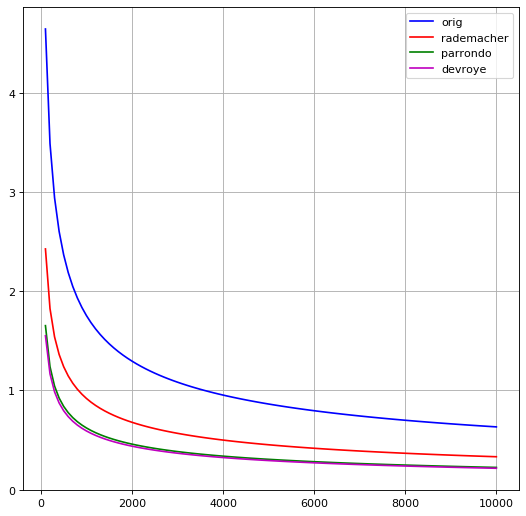

In [11]:
plot_bounds(100, 10000, 100)

---

<img src="hw4_images/hw4p4.png">

**Answer**

Minimize mean squared error:

$$E_{in}(a) = (a x_1-y_1)^2 + (a x_2-y_2)^2$$

$$\frac{d E_{in}}{d a} = 0$$

$$a = \frac{x_1 y_1 + x_2 y_2}{x_1^2 + x_2^2}$$

In [12]:
# training set has 2 examples [x1, x2]
# number of training sets = N
# X is (N, 2)
def make_data_set(N):
    X = np.zeros([N,2])
    X[:,0] = np.random.uniform(-1,1,N)
    X[:,1] = np.random.uniform(-1,1,N)
    return X

def get_g_bar(N):
    X = make_data_set(N)
    Y = np.sin(np.pi*X)
    A = np.sum(X*Y,axis=1) / np.sum(X*X,axis=1)
    a = np.mean(A)
    print(f'a = {a}')
    return

In [13]:
get_g_bar(100000)

a = 1.4274592546292004


Answer is none of the above, [e].

---

<img src="hw4_images/hw4p5.png">

**Answer:**

In [14]:
def get_bias_and_variance(N):
    # get g_bar for h(x) = a*x
    X = make_data_set(N)
    Y = np.sin(np.pi*X)
    A = np.sum(X*Y,axis=1) / np.sum(X*X,axis=1)
    a = np.mean(A)
    # calculate bias and var
    X = np.random.uniform(-1,1,N)
    Y = np.sin(np.pi*X)
    bias = np.mean(np.square(a*X-Y))
    var = np.mean(np.square(A*X-a*X))
    print(f"bias = {bias}")
    print(f"var = {var}")
    return

In [15]:
get_bias_and_variance(100000)

bias = 0.2723229486717742
var = 0.2343619567031222


Answer is 0.3, [b].

---

<img src="hw4_images/hw4p6.png">

**Answer:**

Answer is 0.2, [a].

---

<img src="hw4_images/hw4p7a.png">
<img src="hw4_images/hw4p7b.png">

**Answer:**

a) Model $h(x) = b$:

$$E_{in}(b) = (b-y_1)^2 + (b-y_2)^2$$

$$\frac{d E_{in}}{d b} = 0$$

$$b = \frac{y_1 + y_2}{2}$$

b) Model $h(x) = a x$:

$$E_{in}(a) = (a x_1 - y_1)^2 + (a x_2 - y_2)^2$$

$$\frac{d E_{in}}{d a} = 0$$

$$a = \frac{x_1 y_1 + x_2 y_2}{x_1^2+x_2^2}$$

c) Model $h(x) = a x + b$:

$$E_{in}(a,b) = (a x_1 + b - y_1)^2 + (a x_2 + b - y_2)^2$$

$$\begin{aligned}
& \frac{\partial E_{in}}{\partial a} = 0 \\ \\
& \frac{d E_{in}}{d b} = 0
\end{aligned}$$

System of 2 linear equations with 2 unknowns:

$$\begin{aligned}
& a (x_1^2 + x_2^2) + b (x_1 + x_2) = x_1 y_1 + x_2 y_2 \\
& a (x_1 + x_2) + 2 b = y_1 + y_2
\end{aligned}$$

solution:

$$\begin{aligned}
a & = \frac{y_1 - y_2}{x_1 - x_2} \\ \\
b & = \frac{x_1 y_2 - x_2 y_1}{x_1 - x_2}
\end{aligned}$$

d) Model $h(x) = a x^2$:

$$E_{in}(a) = (a x_1^2 - y_1)^2 + (a x_2^2 - y_2)^2$$

$$\frac{d E_{in}}{d a} = 0$$

$$a = \frac{x_1^2 y_1 + x_2^2 y_2}{x_1^4 + x_2^4}$$

e) Model $h(x) = a x^2+b$:

$$E_{in}(a,b) = (a x_1^2 + b - y_1)^2 + (a x_2^2 + b - y_2)^2$$

$$\begin{aligned}
& \frac{\partial E_{in}}{\partial a} = 0 \\ \\
& \frac{\partial E_{in}}{\partial b} = 0
\end{aligned}$$

System of 2 linear equations with 2 unknowns:

$$\begin{aligned}
& a (x_1^4 + x_2^4) + b (x_1^2 + x_2^2) = x_1^2 y1 + x_2^2 y_2  \\
& a (x_1^2 + x_2^2) + 2 b = y_1 + y_2
\end{aligned}$$

solution:

$$\begin{aligned} 
a & = \frac{y_1 - y_2}{x_1^2 - x_2^2} \\ \\
b & = \frac{x_1^2 y_2 - x_2^2 y_1}{x_1^2 - x_2^2}
\end{aligned}$$

Get bias and var for each of the five hypotheses $h(x)$ in python:

In [16]:
def problem_7(N):
    # training set
    X_t = make_data_set(N)
    Y_t = np.sin(np.pi*X_t)
    # out of sample set to evaluate bias and variance
    X = np.random.uniform(-1,1,N)
    Y = np.sin(np.pi*X)
    # case a: h(x) = b
    B = 0.5*np.sum(Y_t,axis=1)
    b = np.mean(B)
    bias_a = np.mean(np.square(b-Y))
    var_a = np.mean(np.square(B-b))
    # case b: h(x) = a*x
    A = np.sum(X_t*Y_t,axis=1) / np.sum(X_t*X_t,axis=1)
    a = np.mean(A)
    bias_b = np.mean(np.square(a*X-Y))
    var_b = np.mean(np.square(A*X-a*X))
    # case c: h(x) = a*x + b
    A = (Y_t[:,0]-Y_t[:,1])/(X_t[:,0]-X_t[:,1])
    a = np.mean(A)
    B = (X_t[:,0]*Y_t[:,1]-X_t[:,1]*Y_t[:,0])/(X_t[:,0]-X_t[:,1])
    b = np.mean(B)
    bias_c = np.mean(np.square(a*X+b-Y))
    var_c = np.mean(np.square(A*X+B-(a*X+b)))
    # case d: h(x) = a*x^2
    A = np.sum(np.square(X_t)*Y_t,axis=1) / np.sum(np.power(X_t,4),axis=1)
    a = np.mean(A)
    bias_d = np.mean(np.square(a*X*X-Y))
    var_d = np.mean(np.square(A*X*X-a*X*X))
    # case e: h(x) = a*x^2 + b
    A = (Y_t[:,0]-Y_t[:,1])/(np.square(X_t[:,0])-np.square(X_t[:,1]))
    a = np.mean(A)
    B = (np.square(X_t[:,0])*Y_t[:,1]-np.square(X_t[:,1])*Y_t[:,0])/ \
        (np.square(X_t[:,0])-np.square(X_t[:,1]))
    b = np.mean(B)
    bias_e = np.mean(np.square(a*X*X+b-Y))
    var_e = np.mean(np.square(A*X*X+B-(a*X*X+b)))
    # print results
    print(f"case a: bias = {bias_a}, var = {var_a}, Eout = {bias_a + var_a}")
    print(f"case b: bias = {bias_b}, var = {var_b}, Eout = {bias_b + var_b}")
    print(f"case c: bias = {bias_c}, var = {var_c}, Eout = {bias_c + var_c}")
    print(f"case d: bias = {bias_d}, var = {var_d}, Eout = {bias_d + var_d}")
    print(f"case e: bias = {bias_e}, var = {var_e}, Eout = {bias_e + var_e}")
    return

In [17]:
problem_7(100000)

case a: bias = 0.5005560466362249, var = 0.24963456543485205, Eout = 0.750190612071077
case b: bias = 0.2699116075213415, var = 0.23519772976097297, Eout = 0.5051093372823146
case c: bias = 0.20644625354085147, var = 1.6343831017538637, Eout = 1.8408293552947153
case d: bias = 0.5005606245246499, var = 12.945363235708037, Eout = 13.445923860232686
case e: bias = 0.7290859775386233, var = 44979.75734800498, Eout = 44980.48643398252


Note: Repeated runs show differences in var for case [d], and both bias and var for case [e].
This is normal as we are fitting parabolas. $\bar g(x)$ will be all over the place.

Smallest expected value of $E_{out}$ is case [b]. Answer is [b].

---

<img src="hw4_images/hw4p8.png">

**Answer:**

The VC dimension $d_{vc}$ is the largest value of $N$ for which $m_H(N) = 2^N$.

- For $N < q$, we have $\binom{N}{q}=0$ thus $m_H(N) = 2^N$.

- For $N ≥ q$, we have $\binom{N}{q} ≠ 0$ thus $m_H(N) ≠ 2^N$.

- For $N = q-1$, we have $m_H(N+1) = m_H(q) = 2 m_H(q-1) = 2^q$

- For $N = q$, we have $m_H(N+1) = m_H(q+1) = 2 m_H(q) - \binom{q}{q} = 2^q - 1$

Thus VC dimension is $q$, and answer is [c].

___

<img src="hw4_images/hw4p9.png">

**Answer:**

Hypothesis set contains $M$ hypotheses. If its VC dimension is $d$, then you need at least $2^d$ hypotheses to shatter $d$ points.

$$M ≥ 2^d$$

where from:

$$d ≤ \log_2(M)$$

Lower bound is the worst case, when hypothesis set contains 0 or 1 hypothesis. Then $d = 0$. This eliminates [d] and [e] as their lower bound is not 0, so they are incorrect.

Suppose you can shatter $d+1$ points in the intersection. The hypotheses in the intersection belong to the every individual $H_k$. This means every individual hypothesis set $H_k$ can shatter $d+1$ points, and the $H_k$ with the minimum VC dimension $\min(d_k)$ can also shatter $d+1$ points. This is impossible - a contradiction. Thus upper bound is $\min(d_k)$.

Answer is [b].

---

<img src="hw4_images/hw4p10a.png">
<img src="hw4_images/hw4p10b.png">

**Answer:**

Lower bound is the maximum VC dimension from the individual $H_k$ sets, i.e. $\max(d_k)$, because the hypotheses that shatter the $\max(d_k)$ points will also be in the union. This eliminates [a], [b], and [c].

For the upper bound, set $K=2$ for simplicity.  
Given a hypothesis set $H$ with VC dimension $d$, we have:

$$m_H(N) ≤ B(N,d+1) = \sum_{i=0}^d\binom{N}{i}$$

Let $H_1$ and $H_2$ be two hypothesis sets with VC dimensions $d_1$ and $d_2$. Construct two disjoint $H_1'$ and $H_2'$ as follows:

$$H_1' = H_1$$

$$H_2' = H_2 - \cap(H_1,H_2)$$

The VC dimension of $H_1'$ is $d_1$.

The VC dimension of $H_2'$ is $d_2' ≤ d_2$

Let $H$ be the union of $H_1$ and $H_2$:

$$H = \cup(H_1,H_2) = \cup(H_1',H_2')$$

Let $N = d_1+d_2+1$. First compute a higher bound for $h_H(N)$:

$$\begin{aligned}
m_H(N) ≤ m_{H_1'}(N) + m_{H_2'}(N) & ≤ \sum_{i=0}^{d_1}\binom{N}{i} + \sum_{i=0}^{d_2'}\binom{N}{i} \\
& ≤ \sum_{i=0}^{d_1}\binom{N}{i} + \sum_{i=0}^{d_2}\binom{N}{i}
\end{aligned}$$

which we can simplify using a new index $i_{new} = N-i$ in the second term:

$$\begin{aligned}
\sum_{i=0}^{d_1}\binom{N}{i} + \sum_{i=0}^{d_2}\binom{N}{i} & = \sum_{i=0}^{d_1}\binom{N}{i} + \sum_{i=N-d_2}^N \binom{N}{i} \\
& = \sum_{i=0}^{d_1}\binom{N}{i} + \sum_{i=d_1+1}^N \binom{N}{i} \\
& = 2^N
\end{aligned}$$

For $m_H(N) = 2^N$ to be true, i.e. for $H$ to shatter $N$, all inequalities must be equalities. In other words:

1. Growth functions of $H_1$ and $H_2$ must be exactly $B(N,d_1+1)$ and $B(N,d_2+1)$.  
2. Removing the intersection of $H_1$ and $H_2$ does not decrease the VC dimension of $H_2$. This holds if the intersection is empty, i.e. $H_1$ and $H_2$ are disjoint.

This means that the VC dimension of $H$ is at least $d_1+d_2+1$, which eliminates [d].

Answer is [e].

---